<a href="https://colab.research.google.com/github/Hamifthi/fast_ai_pratices/blob/master/cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!nvidia-smi

Wed Jun 12 05:18:48 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [5]:
!pip install kaggle
!rm -r sample_data
!mkdir .kaggle

rm: cannot remove 'sample_data': No such file or directory


In [0]:
import json
token = {"username":"hamiai","key":"5b08bc78a0da0576451c203c1c42f91a"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [8]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json

- path is now set to: {/content}


In [9]:
!kaggle competitions download -c histopathologic-cancer-detection -p /content/

  0% 0.00/1.33M [00:00<?, ?B/s]
100% 1.33M/1.33M [00:00<00:00, 90.2MB/s]
  0% 0.00/5.10M [00:00<?, ?B/s]
100% 5.10M/5.10M [00:00<00:00, 84.1MB/s]
 99% 1.29G/1.30G [00:08<00:00, 205MB/s]
100% 1.30G/1.30G [00:08<00:00, 170MB/s]
100% 4.96G/4.98G [00:36<00:00, 124MB/s]
100% 4.98G/4.98G [00:36<00:00, 146MB/s]


In [10]:
!unzip -qq /content/test.zip -d /content/data/test
!rm /content/test.zip
!unzip -qq /content/train.zip -d /content/data/train
!rm /content/train.zip
!unzip -qq /content/train_labels.csv.zip -d /content/data
!rm /content/train_labels.csv.zip
!ls

data  gdrive  models  sample_submission.csv.zip


In [0]:
from fastai import *
from fastai.vision import *
from PIL import Image

In [0]:
path = './data'
path_to_train_images = './data/train'

In [0]:
# fnames = get_image_files(path_to_train_images)
# sizes = {image_id: Image.open(image_id).size for image_id in fnames}

In [0]:
# rows_size, columns_size = list(zip(*sizes.values()))

In [0]:
# plt.hist(rows_size)

In [0]:
# plt.hist(columns_size)

In [0]:
!mv data/train_labels.csv data/train/labels.csv

In [0]:
np.random.seed(44)
data = ImageDataBunch.from_csv(path_to_train_images, suffix='.tif', size = 224, bs = 64, ds_tfms = get_transforms(flip_vert = False, max_lighting = 0.1, max_zoom = 1.1, max_warp = 0.))

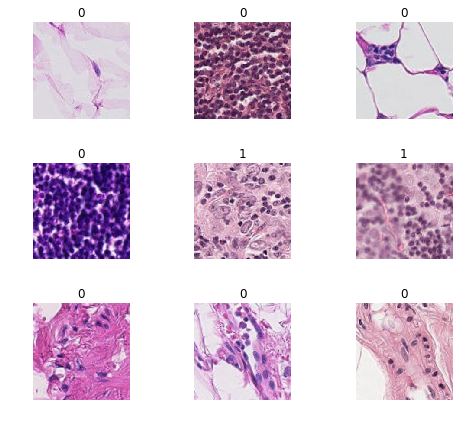

In [19]:
data.show_batch(rows = 3, figsize=(7, 6))

In [20]:
data.normalize()

ImageDataBunch;

Train: LabelList (176020 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,0,0,0
Path: data/train;

Valid: LabelList (44005 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
1,0,0,0,0
Path: data/train;

Test: None

In [21]:
model = cnn_learner(data, models.resnet101, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:08<00:00, 22185633.47it/s]


In [22]:
model.unfreeze()
model.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         4,096      True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
___________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


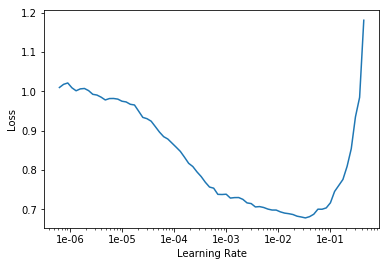

In [23]:
model.lr_find()
model.recorder.plot()

In [24]:
model.fit_one_cycle(8, max_lr = slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.150143,0.130484,0.952346,53:06
1,0.140758,0.117255,0.958005,53:01
2,0.112593,0.091658,0.967981,52:51
3,0.095636,0.077900,0.972685,52:47
4,0.073591,0.074432,0.974776,52:47


Buffered data was truncated after reaching the output size limit.

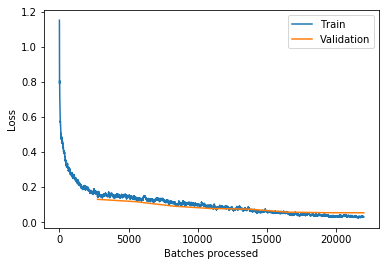

In [25]:
model.recorder.plot_losses()

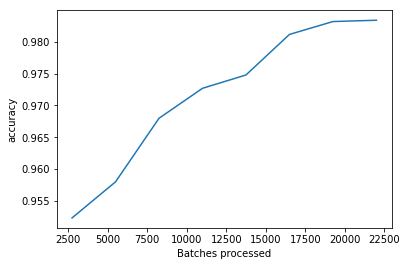

In [30]:
model.recorder.plot_metrics()

In [0]:
model.save(root_dir + 'resnet100_third_run')